In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Data loading

In [3]:
df = pd.read_csv('data\Life-Expectancy-Data-Updated.csv')

# Simple renaming to improve readability
df=df.rename(columns={'Thinness_ten_nineteen_years':'Thinness (10-19 years)',\
                      'Thinness_five_nine_years':'Thinness (5-9 years)', \
                      'Economy_status_Developed' : 'Developed', \
                      'Economy_status_Developing' : 'Developing'                  
                     })
df_reduced = df.drop(['Infant_deaths', 'Under_five_deaths', 'Diphtheria', 'Thinness (5-9 years)'], axis=1)

## Modelling

### PCA Analysis

In [6]:
X = df_reduced.drop(['Life_expectancy', 'Country', 'Region'], axis=1)
y = df_reduced['Life_expectancy']

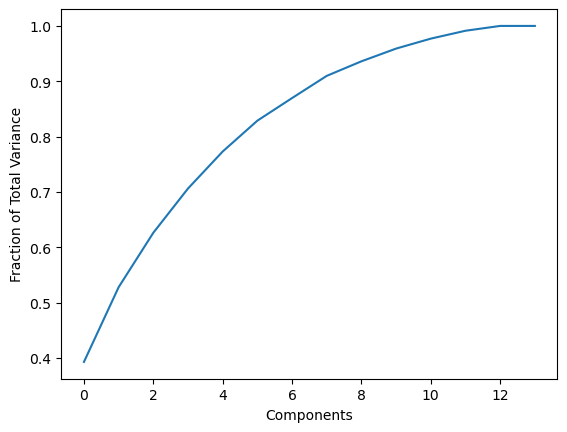

In [7]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
_ = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Fraction of Total Variance')
plt.show()

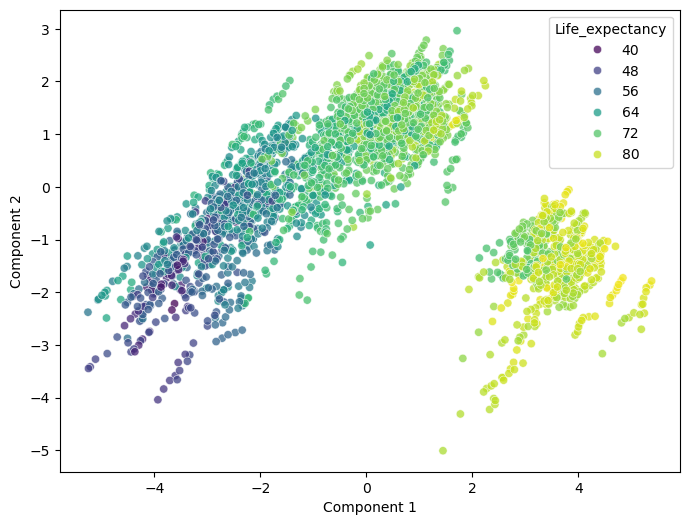

In [8]:
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_reduced['Life_expectancy'], palette='viridis', alpha=0.75);
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [9]:
df_train, df_test = train_test_split(df_reduced, test_size=0.2, random_state=42)

X_train = df_train.drop('Life_expectancy', axis=1)
y_train = df_train['Life_expectancy']

X_test = df_test.drop('Life_expectancy', axis=1)
y_test = df_test['Life_expectancy']

columns = ['Adult_mortality','Schooling', 'GDP_per_capita', 'Incidents_HIV', 'Developed']
X_train_subset = X_train[columns]
X_test_subset = X_test[columns]

In [10]:
def plot_results(model):
    model.fit(X_train_subset, y_train)
    y_predict = model.predict(X_test_subset)
    mse = mean_squared_error(y_predict, y_test)
    print(f'The MSE is: {mse:.3f}')
    plt.scatter(y_predict, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### Linear model

The MSE is: 4.504


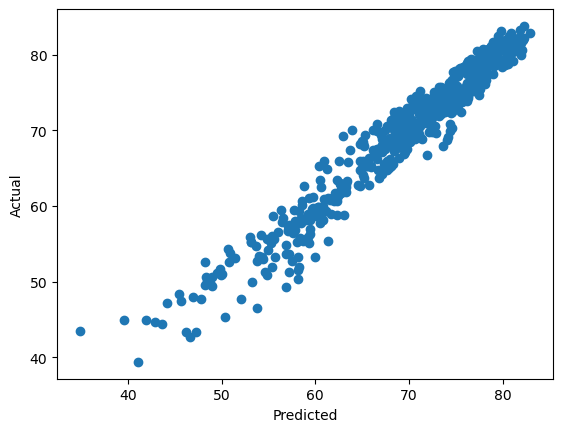

In [12]:
plot_results(LinearRegression())

### Decision Tree

The MSE is: 1.263


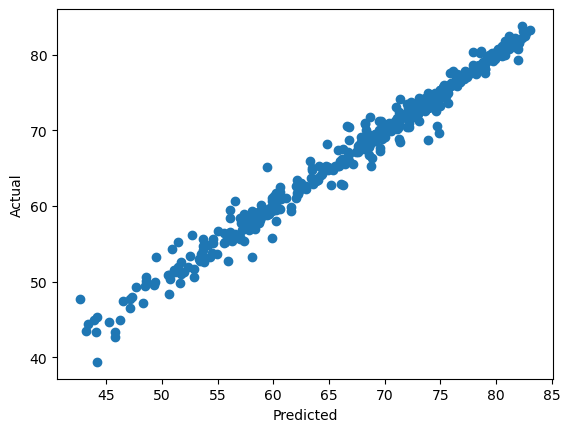

In [14]:
plot_results(DecisionTreeRegressor(random_state=42))

### RandomForestRegressor

The MSE is: 0.737


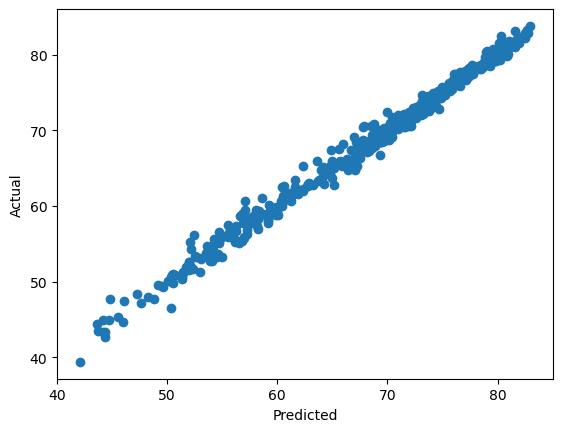

In [16]:
plot_results(RandomForestRegressor(random_state=42))

### Gradient Boost

The MSE is: 2.054


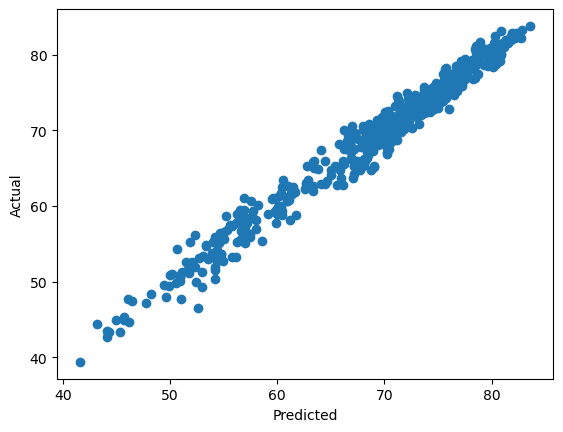

In [18]:
plot_results(GradientBoostingRegressor(random_state=0))

### XGBoost

The MSE is: 0.553


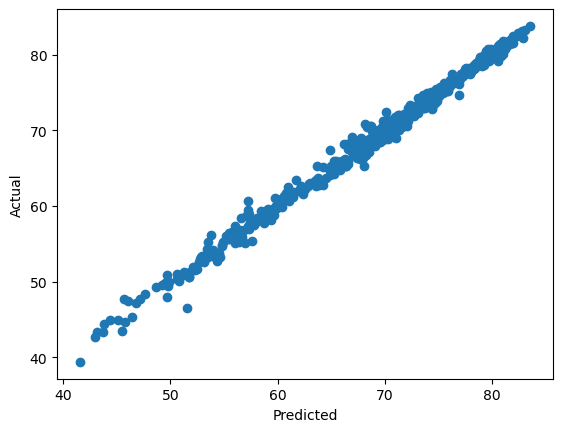

In [20]:
plot_results(XGBRegressor(n_estimators=5_000, learning_rate=0.08, n_jobs=8))

### Extra Trees

The MSE is: 0.441


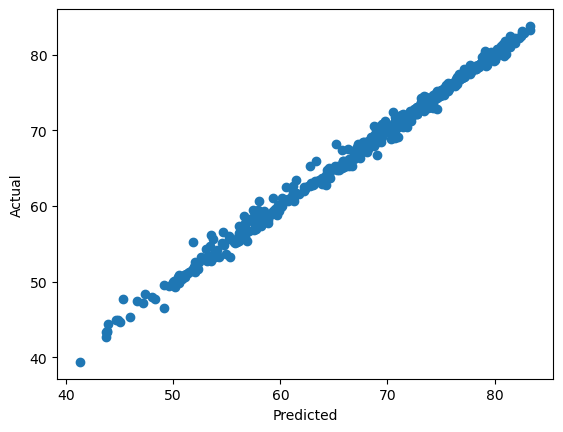

In [22]:
plot_results(ExtraTreesRegressor(n_estimators=1_000))

### K-Nearest-Neighbours

The MSE is: 8.438


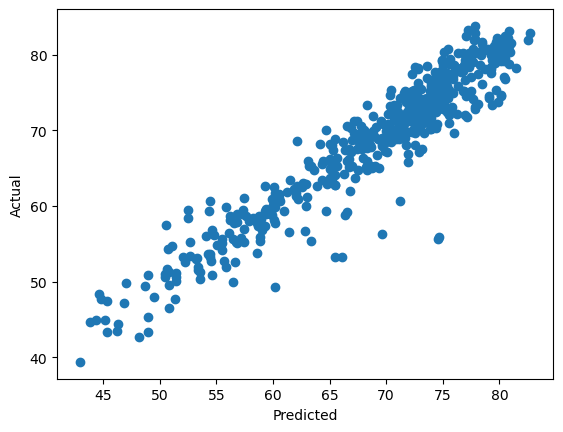

In [24]:
plot_results(KNeighborsRegressor())

### Permutation importance

In [26]:
model = ExtraTreesRegressor(n_estimators=1_000)
model.fit(X_train_subset, y_train)
result = permutation_importance(model, X_test_subset, y_test)

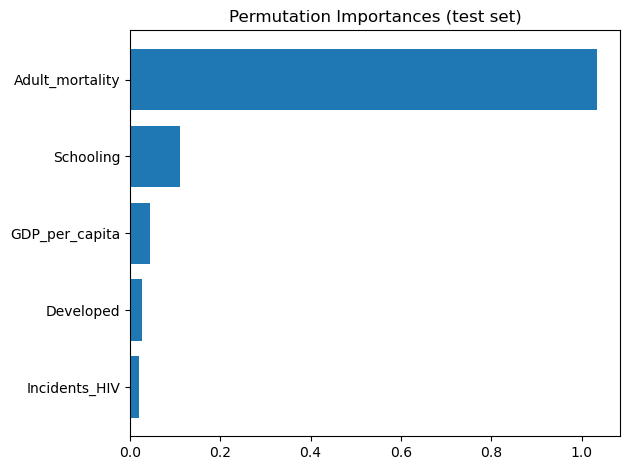

In [27]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_test_subset.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()